# Машинное обучение

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [2]:
import numpy as np

Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [15]:
def max_element(arr):
    zero = arr==0;
    print (arr[1:][zero[:-1]].max());
newArray=np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]);
max_element(newArray);

5


Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [16]:
def nearest_value(X, v):
    deviations = np.abs(X - v)
    return X[np.where(deviations == np.min(deviations))][0]
x= np.arange(0,10).reshape((2, 5)) 
v=3.6
nearest_value(x, v )

4

Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [3]:
def scale(X):
    means, stds = np.mean(X, axis=0), np.std(X, axis=0)
    print((X - means)/stds)
    
X = np.random.randint(0, 50, size = (4, 4))    
scale(X)

[[ 0.84763109  0.67648143  0.72760688 -0.16401635]
 [-1.59799305  1.27779825  0.72760688 -1.1845625 ]
 [ 0.84763109 -0.97713984 -1.69774938  1.58549134]
 [-0.09726914 -0.97713984  0.24253563 -0.2369125 ]]


 Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [5]:
from numpy import linalg as la
def get_stats(X):
    print("Определитель: ", np.linalg.det(X))
    print("След: ", np.trace(X))
    print('Наименьший элемент: ', np.amin(X))
    print('Наибольший элемент: ', np.amax(X))
    print("Норма Фробениуса: ", np.linalg.norm(X))
    print("Собственные числа: ", np.linalg.eig(X)[0])
    print("Обратная матрица: ", np.linalg.inv(X))
       
X = np.array([np.random.normal(10, 1, 3) for i in range(3)])
print(X)
get_stats(X)

[[10.45918998 10.87728114 10.76424368]
 [10.8875016  10.8467367  10.62500222]
 [ 8.53942986 12.19009498 10.77345763]]
Определитель:  10.19512801941268
След:  32.07938430865141
Наименьший элемент:  8.539429857699524
Наибольший элемент:  12.190094984973197
Норма Фробениуса:  32.09745425461858
Собственные числа:  [31.99182466+0.j          0.04377983+0.56281657j  0.04377983-0.56281657j]
Обратная матрица:  [[-1.24205679  1.3762677  -0.11630856]
 [-2.60561475  2.03637818  0.59506889]
 [ 3.93273447 -3.3950275  -0.4883054 ]]


Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [6]:
vals = np.empty(100)
for exp_num in range(100):
    x1 = np.random.normal(0, 1, (10, 10))
    x2 = np.random.normal(0, 1, (10, 10))
    vals[exp_num] = np.max(x1.dot(x2))
    
print("Среднее: ", np.average(vals))
print("95% квантиль: ", np.percentile(vals, 95))

Среднее:  8.142352346636258
95% квантиль:  11.43339545972563


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

In [7]:
import pandas as pd
%matplotlib inline

Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [8]:
data = pd.read_csv("2008.csv")

A=0; B=0;C=0;D=0;
for val in data.CancellationCode: #перебор значений в объекте forech c#
    if val=='A':
        A=A+1
    if val=='B':
        B=B+1
    if val=='C':
        C=C+1
    if val=='D':
        D=D+1

if A>B and A>C and A>D:
    print ('A-carrier =',A)
        
else:
    if B>A and B>C and B>D:
        print ('B-weather =',B)
    else:
        if C>A and C>B and C>D:
            print ('C-NAS =',C) 
        else:
            if D>A and D>B and D>C:
                print ('D-security =',D) 
            else:
                 print(' A-carrier =',A,'\n', 'B-weather =',B,'\n', 
                       'C-NAS =',C,'\n','D-security =',D)


A-carrier = 563


 Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [9]:
data = pd.read_csv("2008.csv")
dists = data["Distance"]
print ("Максимальное расстояние: = ", dists.max())
print ("Среднее расстояние: = ", dists.mean())
print ("Минимальное расстояние: = ", dists.min())

Максимальное расстояние: =  4962
Среднее расстояние: =  724.5082571428571
Минимальное расстояние: =  31


 Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [28]:
susp=data[(data.Distance== 31)][['Distance',"Month", 'DayofMonth', 'FlightNum']].sort_values('FlightNum') ;
print (susp);
susp=data[(data.FlightNum==64) & (data.Distance!= 31)][['Distance','Month','DayofMonth', 'FlightNum']].sort_values('Distance')
print ('FlightNum=64: ','\n',susp);

susp=data[(data.FlightNum==65) & (data.Distance!= 31)][['Distance','Month','DayofMonth', 'FlightNum']].sort_values('Distance')
print ('FlightNum=65: ','\n',susp);

       Distance  Month  DayofMonth  FlightNum
27534        31      3          11         64
48112        31      2          28         64
1116         31     12          30         65
46082        31      8           9         65
FlightNum=64:  
        Distance  Month  DayofMonth  FlightNum
44810        82      2          12         64
3869         82      7           1         64
32242        82      9          23         64
30053        82      1           4         64
12980        82      8           6         64
55053       123      3          31         64
4466        123      6          29         64
8448        123      2          10         64
29801       123      4          23         64
10833       372      3          31         64
64319       414      5           3         64
501         533      3          20         64
25671       533      1          15         64
67172       533      3          22         64
9615        533      1           4         64
58530       571  

Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [11]:
IATA_code = data.groupby('Origin').size().idxmax()
airports = pd.read_csv('airports.csv') # http://stat-computing.org/dataexpo/2009/supplemental-data.html
print(IATA_code, "находится в городе ", airports[airports['iata'] == IATA_code]['city'].values)

ATL находится в городе  ['Atlanta']


Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [12]:
time_mean = data[['Origin', 'AirTime' ]].groupby('Origin').mean()
print("Аэропорт с интентификатором ", time_mean['AirTime'].idxmax())

Аэропорт с интентификатором  SJU


Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [13]:
all_flights = data.groupby("Origin").size()
delayed_flights = data[data["DepDelay"] > 0].groupby("Origin").size()
fraction_delayed = delayed_flights[all_flights > 1000] / all_flights[all_flights > 1000]
max_fraction_delayed = fraction_delayed.idxmax()
print (fraction_delayed.max())
airports[airports["iata"] == max_fraction_delayed]

0.5111591072714183


,iata,airport,city,state,country,lat,long
1436,EWR,Newark Intl,Newark,NJ,USA,40.692497,-74.168661


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [82]:
data = pd.read_csv('2008.csv')

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [83]:
s=data.isnull().sum()
print('Имеются ли в данных пропущенные значения: ', s.count()>0)
print('Всего пропущенных элементов в таблице "объект-признак": ',data.isnull().sum().sum())
print('Количество объектов, имеющих хотя бы один пропуск: {}'.format(np.sum(np.any(data, axis=1))))
#print('Количество признаков всего: ',s.count())
#print('Признаки, имеющие хотя бы одно пропущенное значение: ','\n',s)
pr_null=0
for pr in s:
    if pr > 0:
        pr_null+=1  
print('Количество признаков, имеющих хотя бы одно пропущенное значение: ',pr_null)

Имеются ли в данных пропущенные значения:  True
Всего пропущенных элементов в таблице "объект-признак":  355215
Количество объектов, имеющих хотя бы один пропуск: 70000
Количество признаков, имеющих хотя бы одно пропущенное значение:  16


In [84]:
print(data['DepDelay'].isnull().sum(), 'пропущенных значений в целевой переменной')

1399 пропущенных значений в целевой переменной


In [85]:
#Исключаем из выборки объекты с пропущенным значением целевой переменной и со значением целевой переменной, равным 0
data=data[(data.DepDelay!=0) & (data.DepDelay.notnull())]
print(data)

       Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0      2008      6          18          3   2111.0        2055   2308.0   
1      2008      6           4          3   1426.0        1410   1730.0   
2      2008      8           3          7   1143.0        1145   1501.0   
3      2008      1          23          3   1141.0        1144   1323.0   
4      2008      5           4          7    815.0         820   1243.0   
...     ...    ...         ...        ...      ...         ...      ...   
69994  2008      1          26          6    920.0         925   1110.0   
69995  2008      5          12          1   1829.0        1840   2137.0   
69996  2008      5          11          7   1149.0        1125   1336.0   
69998  2008      2          18          1   1906.0        1900   2200.0   
69999  2008     12           6          6    859.0         900    959.0   

       CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0            2300    

In [86]:
#выделяем целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак"
vect = data['DepDelay']
data.drop(['DepDelay'], axis = 1, inplace = True)

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [87]:
for pr in ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']:
    data[pr+'_Hour'] = data[pr]//100
    data[pr+'_Minute'] = data[pr]%100
print(data)

       Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0      2008      6          18          3   2111.0        2055   2308.0   
1      2008      6           4          3   1426.0        1410   1730.0   
2      2008      8           3          7   1143.0        1145   1501.0   
3      2008      1          23          3   1141.0        1144   1323.0   
4      2008      5           4          7    815.0         820   1243.0   
...     ...    ...         ...        ...      ...         ...      ...   
69994  2008      1          26          6    920.0         925   1110.0   
69995  2008      5          12          1   1829.0        1840   2137.0   
69996  2008      5          11          7   1149.0        1125   1336.0   
69998  2008      2          18          1   1906.0        1900   2200.0   
69999  2008     12           6          6    859.0         900    959.0   

       CRSArrTime UniqueCarrier  FlightNum  ... SecurityDelay  \
0            2300            WN   

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [88]:
import matplotlib.pyplot as plt

In [89]:
data.corr()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.000000,-0.004838,-0.010617,-0.008733,-0.006267,-0.002939,0.002609,0.006598,-0.014230,...,0.008620,0.017445,-0.008803,0.002405,-0.006727,0.011477,-0.002887,-0.001491,0.002805,-0.005353
DayofMonth,NaN,-0.004838,1.000000,0.015818,0.001841,0.002170,-0.001645,0.000754,0.009847,-0.008110,...,-0.007752,0.009641,0.001605,0.006268,0.002206,-0.000784,-0.001435,-0.006125,0.000708,0.001285
DayOfWeek,NaN,-0.010617,0.015818,1.000000,0.005859,0.005446,0.005732,0.006262,-0.005878,0.010330,...,0.005031,0.007566,0.005866,-0.000551,0.005484,-0.000623,0.005762,-0.000901,0.006235,0.000784
DepTime,NaN,-0.008733,0.001841,0.005859,1.000000,0.961622,0.708212,0.789659,-0.004003,-0.017291,...,-0.007735,0.206491,0.999319,-0.040352,0.960319,0.098171,0.707787,0.008765,0.788879,0.028827
CRSDepTime,NaN,-0.006267,0.002170,0.005446,0.961622,1.000000,0.687175,0.787925,-0.011556,-0.016495,...,-0.012709,0.195502,0.960531,-0.026992,0.999260,0.086152,0.686742,0.009113,0.787139,0.028978
ArrTime,NaN,-0.002939,-0.001645,0.005732,0.708212,0.687175,1.000000,0.852710,-0.019147,0.033074,...,-0.002509,-0.002574,0.707376,-0.018849,0.685880,0.079671,0.999417,0.011869,0.852475,0.014744
CRSArrTime,NaN,0.002609,0.000754,0.006262,0.789659,0.787925,0.852710,1.000000,-0.030779,0.052724,...,-0.013597,0.151321,0.788642,-0.018868,0.786698,0.084561,0.852298,0.007626,0.999338,0.027539
FlightNum,NaN,0.006598,0.009847,-0.005878,-0.004003,-0.011556,-0.019147,-0.030779,1.000000,-0.324021,...,0.009387,-0.022415,-0.003754,-0.006509,-0.011477,-0.002824,-0.019202,0.001697,-0.031454,0.018267
ActualElapsedTime,NaN,-0.014230,-0.008110,0.010330,-0.017291,-0.016495,0.033074,0.052724,-0.324021,1.000000,...,0.002250,-0.085353,-0.017290,0.000991,-0.016923,0.009981,0.033067,0.000021,0.052552,0.005242


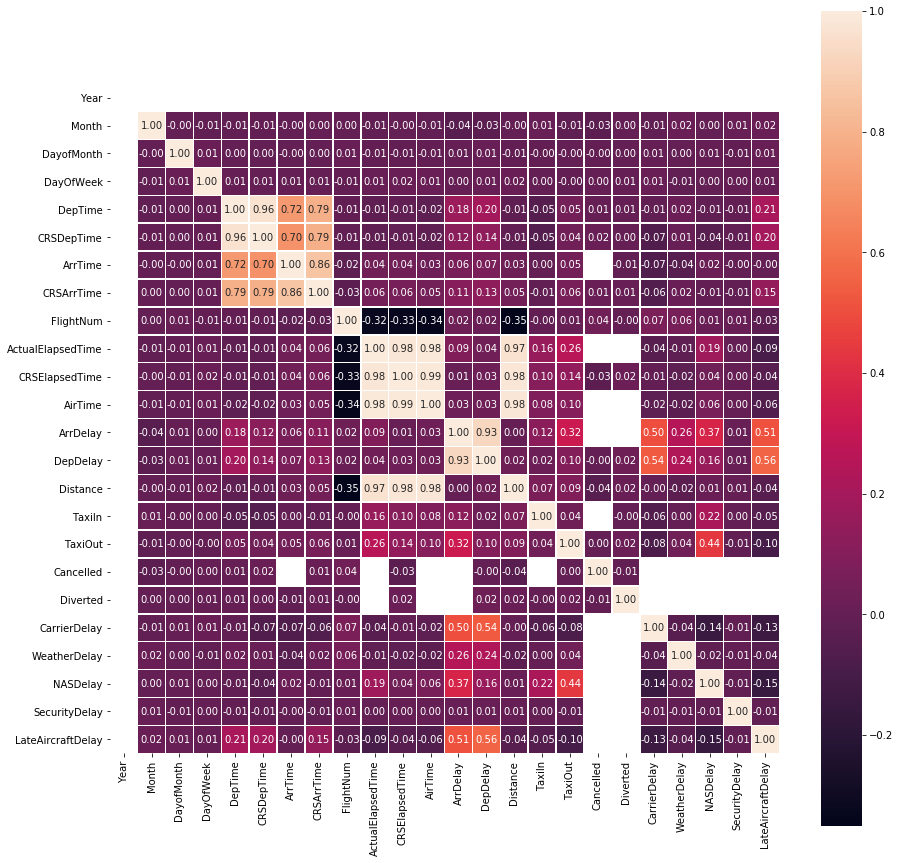

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
data_new = pd.read_csv('2008.csv') 
corrmat = data_new.corr() 

f, ax = plt.subplots(figsize =(15,15))
sns.heatmap(corrmat, annot=True, fmt=".2f", square=True, linewidths=.5,  ax=ax)
corr_DepDelay = corrmat.loc['DepDelay',:] 




In [99]:
corr_DepDelay[corr_DepDelay >= 0.5]

ArrDelay             0.930046
DepDelay             1.000000
CarrierDelay         0.535580
LateAircraftDelay    0.558168
Name: DepDelay, dtype: float64

In [100]:
#Исключаем признаки, оказывающуие значимое влияние на прогноз
data.drop(['ArrDelay','CarrierDelay','LateAircraftDelay'], axis = 1, inplace = True)
#Исключаем признаки, сильно коррелирующие с ответами
data.drop(['CRSElapsedTime','ActualElapsedTime','AirTime'], axis = 1, inplace = True)
data.shape

(63404, 30)

In [101]:
#Исключаем признаки TailNum и Year
data.drop(['TailNum','Year'], axis = 1, inplace = True)
data.shape

(63404, 28)

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

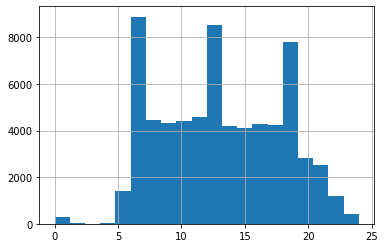

In [19]:
data['DepTime_Hour'].hist(bins=20)

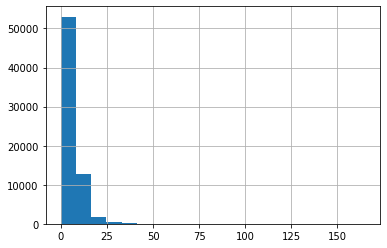

In [20]:
data['TaxiIn'].hist(bins=20)

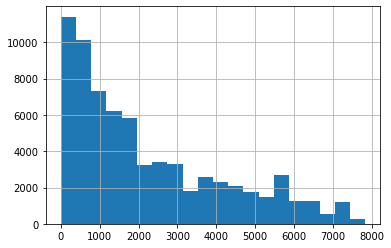

In [21]:
data['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [34]:
from sklearn.preprocessing import StandardScaler

def transform_data(data):
    ss = StandardScaler()
    for col in data.columns:
        if data[col].dtype.name == 'object':
            data[col].fillna('nan', inplace = True)
        else:
            data[col].fillna(0, inplace = True)
            data[col]= ss.fit_transform(data[col].values.reshape(-1, 1)).flatten('F')
    data = pd.get_dummies(data)
    return data 

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [35]:
data_transform_data=transform_data(data)
data_transform_data.shape
print('После преобразования получилось ', data_transform_data.shape[1], ' признака')

После преобразования получилось  647  признака


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_transform_data, vect, test_size=0.3, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [55]:
X_train1, y_train1 = X_train[:1000], y_train[:1000]
LinReg = LinearRegression()
LinReg.fit(X_train1, y_train1)
LinReg_train = LinReg.predict(X_train1)
LinReg_test = LinReg.predict(X_test)

mse_train=mean_squared_error(y_train1, LinReg_train)
mse_test=mean_squared_error(y_test, LinReg_test)

r2_score_train=r2_score(y_train1, LinReg_train)
r2_score_test=r2_score(y_test, LinReg_test)

print('Train','\n','MSE: ', mse_train,'\n','𝑅2: ', r2_score_train,'\n')
print('Test','\n','MSE: ', mse_test,'\n','𝑅2: ', r2_score_test)

Train 
 MSE:  2.052628326394931e-25 
 𝑅2:  1.0 

Test 
 MSE:  164.6656919715722 
 𝑅2:  0.8769010147726768


In [56]:
LinReg.coef_

array([ 9.75272242e-15, -1.42108547e-14,  7.35522754e-14,  2.38759498e+01,
        2.90981379e+00, -5.02778618e+01, -1.39710921e+00, -2.70894418e-13,
       -1.94975474e+02,  6.99097706e+01,  1.19438596e+02,  3.91021852e+01,
        3.23296945e-13,  8.60546594e+00,  2.00321596e+01,  8.07752485e+00,
       -1.01895878e+01,  1.61648472e-13, -3.55271368e-14,  7.10542736e-14,
       -2.94875235e-13, -1.84741111e-13, -2.39278978e+01, -8.83586605e-01,
       -2.90230852e+00, -1.12043617e-01,  5.02682863e+01,  1.70652543e+00,
        1.39663384e+00,  5.08121833e-02, -1.02669346e+00, -1.02669346e+00,
        1.09656358e+00, -1.02669346e+00, -1.02669346e+00, -1.02669346e+00,
       -1.02669346e+00, -1.02669346e+00, -1.02669346e+00, -1.02669346e+00,
       -1.02669346e+00, -1.02669346e+00, -1.02669346e+00, -1.02669346e+00,
       -1.02669346e+00, -1.02669346e+00, -1.02669346e+00, -1.02669346e+00,
       -1.02669346e+00, -1.02669346e+00,  2.11531454e-01, -1.69619706e+00,
       -1.69619706e+00, -

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (0.5 балла)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [60]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold

In [70]:
LassR = LassoCV(alphas=np.linspace(0.01, 100, num=1000), cv=KFold(n_splits=5,random_state=42))

LassR.fit(X_train1, y_train1)
LassR_train = LassR.predict(X_train1)
LassR_test = LassR.predict(X_test)

C:\Users\Svetlana.Svetlana-PC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 814.5418075453315, tolerance: 93.551314875
  tol, rng, random, positive)
C:\Users\Svetlana.Svetlana-PC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 872.0087672804041, tolerance: 73.07163487499999
  tol, rng, random, positive)
C:\Users\Svetlana.Svetlana-PC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 872.3673241326239, tolerance: 75.20736800000002
  tol, rng, random, positive)
C:\Users\Svetlana.Svetlana-PC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: C

In [61]:
LassReg.coef_

array([ 3.50984482e-02,  0.00000000e+00,  3.59244506e-02,  7.49749690e-02,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  4.59275204e-02,
       -8.28355928e+00,  6.79070071e+01, -5.75543222e+01,  3.87480655e+01,
       -3.58764314e-01, -4.06483115e+00, -9.92931332e+00, -0.00000000e+00,
       -6.92149363e+00,  1.47220479e-01,  6.18963183e-02,  0.00000000e+00,
       -0.00000000e+00,  1.63667752e-01,  0.00000000e+00,  1.86798716e-02,
        6.60347345e-02, -5.09467194e-02, -1.29524551e-01,  4.54155220e-02,
        4.90215677e-02, -2.22902472e-02, -1.57928355e-01, -1.15284130e-01,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        2.23892608e-01, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [66]:
LassReg.alpha_

0.01

In [71]:
mse_train_LassR=mean_squared_error(y_train1, LassR_train)
mse_test_LassR=mean_squared_error(y_test, LassR_test)

r2_score_train_LassR=r2_score(y_train1, LassR_train)
r2_score_test_LassR=r2_score(y_test, LassR_test)

In [72]:
print('Train','\n','MSE: ', mse_train_LassR,'\n','𝑅2: ', r2_score_train_LassR,'\n')
print('Test','\n','MSE: ', mse_test_LassR,'\n','𝑅2: ', r2_score_test_LassR)

Train 
 MSE:  1.5655646835494703 
 𝑅2:  0.9985227967002328 

Test 
 MSE:  41.42027245013129 
 𝑅2:  0.9690354836796807


In [73]:
RidgeR = RidgeCV(alphas=np.linspace(0.1, 150, num=1000), cv=KFold(n_splits=5,random_state=42))
RidgeR.fit(X_train1, y_train1)
RidgeR_train = RidgeR.predict(X_train1)
RidgeR_test = RidgeR.predict(X_test)

C:\Users\Svetlana.Svetlana-PC\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [74]:
RidgeR.alpha_

0.1

In [75]:
mse_train_RidgeR=mean_squared_error(y_train1, RidgeR_train)
mse_test_RidgeR=mean_squared_error(y_test, RidgeR_test)

r2_score_train_RidgeR=r2_score(y_train1, RidgeR_train)
r2_score_test_RidgeR=r2_score(y_test, RidgeR_test)

print('Train','\n','MSE: ', mse_train_RidgeR,'\n','𝑅2: ', r2_score_train_RidgeR,'\n')
print('Test','\n','MSE: ', mse_test_RidgeR,'\n','𝑅2: ', r2_score_test_RidgeR)

Train 
 MSE:  0.7263402855312578 
 𝑅2:  0.9993146547837883 

Test 
 MSE:  42.19476974865734 
 𝑅2:  0.9684564934214894


### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19. (0 баллов)** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [ ]:
# Your code here

**20. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [76]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
     return np.dot(X,w)

In [77]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    Li = (y-make_pred(X, w))/y
    return np.dot(Li,Li)/y.shape[0]

In [ ]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    pass

In [ ]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    pass

In [ ]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    pass

**21. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [ ]:
def grad_descent(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [ ]:
# Your code here

**22. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23. (1 доп. балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [ ]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
# Your code here

**24. (0.5 доп. балла)** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**25. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [ ]:
# Your code here

Здесь вы можете поделиться своими мыслями по поводу этого задания.

А здесь — вставить вашу любимую картинку.